# Stochastic Multi-Armed Bandits - Value Estimation
These examples come from Chapter 2 of [Reinforcement Learning: An Introduction](https://webdocs.cs.ualberta.ca/~sutton/book/the-book.html) by Sutton and Barto (2nd ed. rev: Oct2015)

In [2]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
module_path1 = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(module_path1)

import bandits as bd
import numpy as np
import pymc3 as pm

The example test environment used in the book is a stochastic 10-arm bandit with action values normally distributed with zero mean and unit variance. The reward from each arm is itself normally distributed with mean equal to the action value of the arm and unit variance.

In the book, they show the average reward and percentage of optimal choice made over 2000 experiments of 1000 trials each, where each experiment corresponds to a different random selection of arm action values. To speed up the simulation time, we limt the number of experiments here to 500.

In [3]:
n_arms = 10
bandit = bd.GaussianBandit(n_arms)
n_trials = 1000
n_experiments = 1000

In [4]:
print(bandit.optimal)
print(bandit.action_values)

1
[-0.62789228  1.46100209  0.90641733  0.51275947  1.28797731 -1.11458892
 -0.57046116  0.34358454 -0.42493725  0.20747769]


## Upper Confidence Bound (UCB1)
Instead of randomly exploring arms, it would be better to try arms that we have less condifence in our estimates. The UCB1 algorithm provides a straightforward way to do this by adding in an exploration factor (based on the number of times the arm has been selected in the past) to the existing value estimate and then greedily selects the modified estiamtes.

/workspace/MAB/bandits/policy.py:55: RuntimeWarning: invalid value encountered in true_divide
  exploration = np.log(agent.t+1) / agent.action_attempts
/workspace/MAB/bandits/policy.py:55: RuntimeWarning: divide by zero encountered in true_divide
  exploration = np.log(agent.t+1) / agent.action_attempts


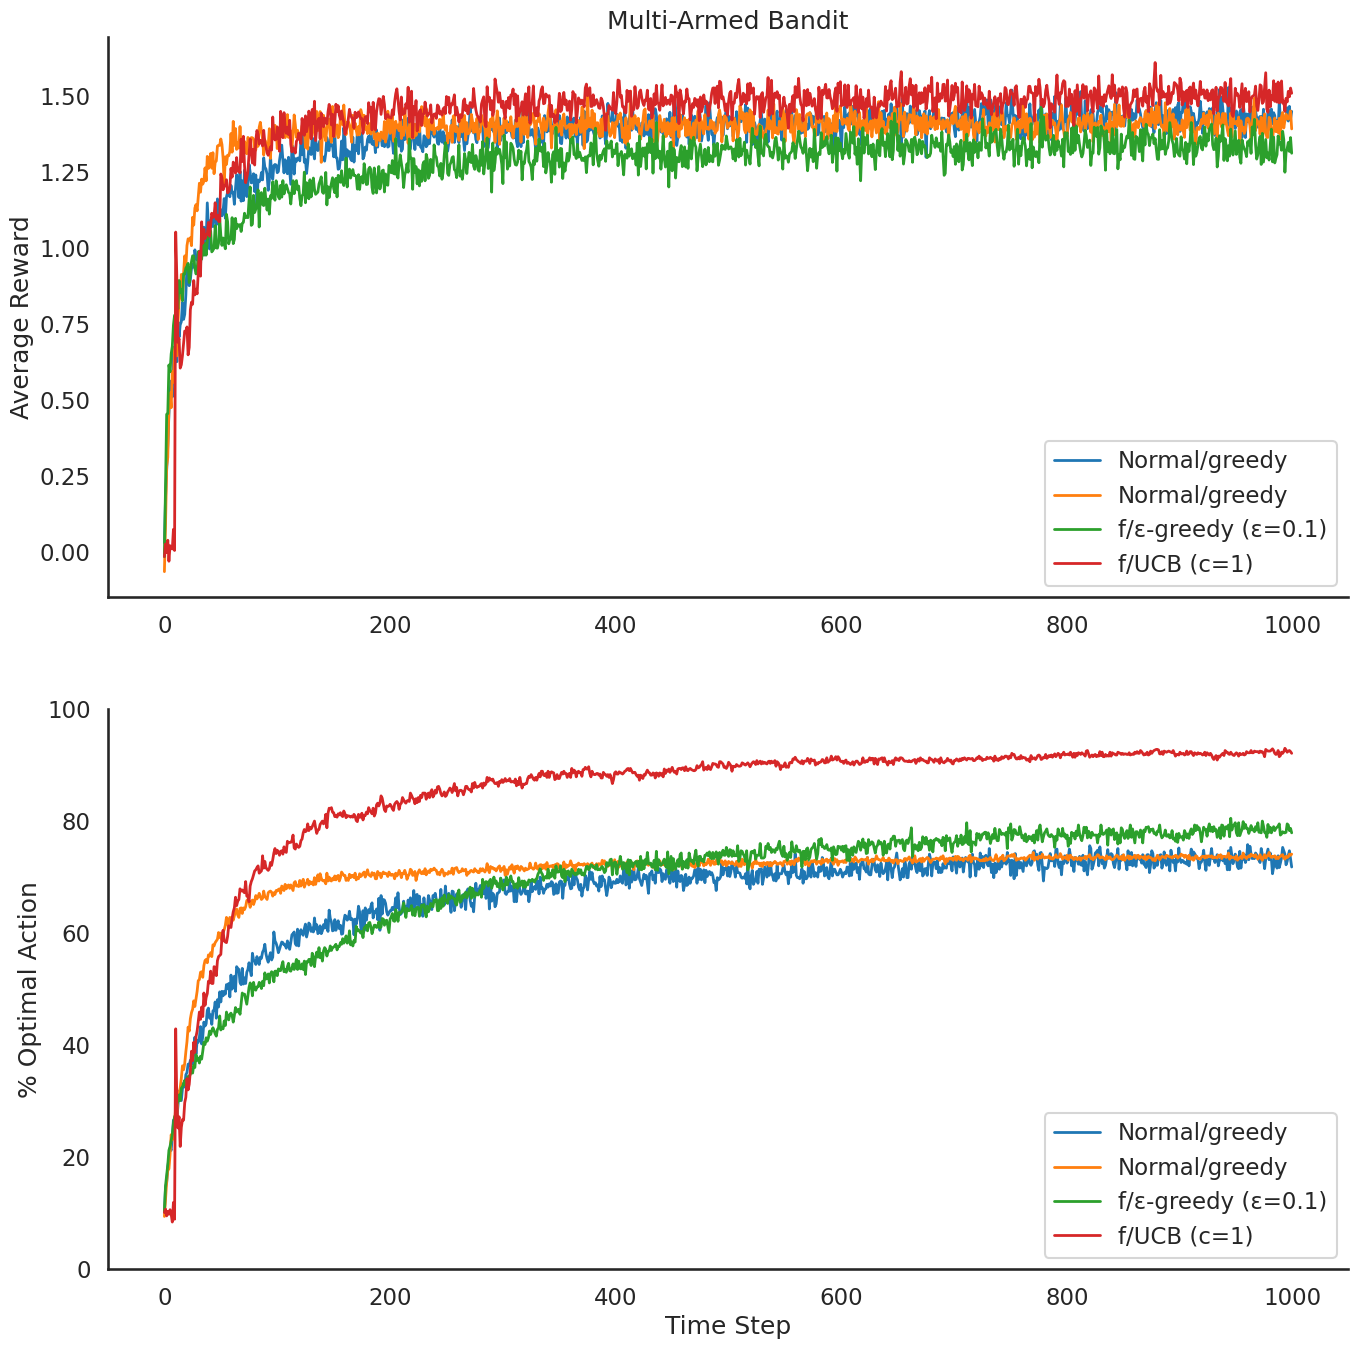

In [5]:
agents = [
    bd.NormalAgent_disc1(bandit, bd.GreedyPolicy()),
    bd.NormalAgent_disc2(bandit, bd.GreedyPolicy()),    
    #bd.NormalAgent(bandit, bd.GreedyPolicy()),    
    #bd.Agent(bandit, bd.GreedyPolicy()),
    #bd.Agent(bandit, bd.GreedyPolicy(), prior=5),
    #bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.01)),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.UCBPolicy(1))
]

env = bd.Environment(bandit, agents)
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)